In [1]:
sc

<SparkContext master=yarn appName=pyspark-shell>

In [10]:
import json

sc.textFile('cikm2020/relevance-transfer-pairs.jsonl')\
    .map(lambda i: json.loads(i))\
    .filter(lambda i: i['relevanceLabel'] > 0)\
    .filter(lambda i: 'CLUEWEB09::WEB' in i['topic'])\
    .map(lambda i: (i['srcId'], 1))\
    .reduceByKey(lambda accum, n: accum + n)\
    .sortBy(lambda i: i[1], ascending=False)\
    .take(25)

[('clueweb09-en0094-66-37974', 344109),
 ('clueweb09-en0008-58-10173', 344103),
 ('clueweb09-en0009-10-14060', 136947),
 ('clueweb09-en0009-63-29928', 136947),
 ('clueweb09-en0009-31-01102', 136947),
 ('clueweb09-en0002-12-08512', 103820),
 ('clueweb09-en0017-33-15624', 103820),
 ('clueweb09-en0001-72-15571', 66810),
 ('clueweb09-en0007-26-07003', 66810),
 ('clueweb09-en0131-43-30507', 66810),
 ('clueweb09-en0001-72-15596', 66810),
 ('clueweb09-en0011-72-18785', 59969),
 ('clueweb09-en0009-16-07084', 35184),
 ('clueweb09-en0006-52-19998', 23343),
 ('clueweb09-en0002-88-10713', 23343),
 ('clueweb09-en0007-31-21766', 23343),
 ('clueweb09-en0022-90-06545', 20255),
 ('clueweb09-en0133-10-53075', 20255),
 ('clueweb09-en0002-27-15296', 19083),
 ('clueweb09-en0002-27-15490', 19082),
 ('clueweb09-en0008-05-35454', 18984),
 ('clueweb09-en0009-79-04013', 18984),
 ('clueweb09-en0003-61-23100', 18984),
 ('clueweb09-en0003-61-23092', 18984),
 ('clueweb09-en0002-28-35595', 18984)]

In [8]:
sc.parallelize(sc.textFile('cikm2020/relevance-transfer-pairs.jsonl')\
    .map(lambda i: json.loads(i))\
    .filter(lambda i: i['relevanceLabel'] > 0)\
    .filter(lambda i: 'CLUEWEB09::WEB' in i['topic'])\
    .map(lambda i: (i['srcId'], 1))\
            
    .take(10)).reduceByKey(lambda accum, n: accum + n).collect()

[('clueweb09-en0008-58-10173', 3),
 ('clueweb09-en0006-33-01013', 1),
 ('clueweb09-en0008-11-03960', 1),
 ('clueweb09-en0017-33-15624', 1),
 ('clueweb09-en0011-78-00514', 1),
 ('clueweb09-en0001-72-15571', 1),
 ('clueweb09-en0007-26-07003', 1),
 ('clueweb09-en0003-71-36817', 1)]

In [ ]:
from pyspark.sql import SQLContext
df = sqlContext.read.json('cikm2020/relevance-transfer-pairs.jsonl')

In [ ]:
df.head(10)

In [ ]:
df.schema()

In [18]:
def mapToJson(uuidToJson):
    import json
    return (uuidToJson[0], json.loads(uuidToJson[1]))

def is_valid_response(i):
    return 'metadata' in i and 'WARC-Type' in i['metadata'] and 'response' == i['metadata']['WARC-Type']

sc.hadoopFile(
    path='/corpora/corpus-commoncrawl/CC-MAIN-2015-11-mapfile/data-r-*/data',
    inputFormatClass='org.apache.hadoop.mapred.SequenceFileInputFormat',
    keyClass='org.apache.hadoop.io.Text',
    valueClass='org.apache.hadoop.io.Text'
).map(lambda i: mapToJson(i))\
.filter(lambda i: is_valid_response(i[1]))\
.take(2)

#key = uuuid value = document

[('0000029d-f539-5e77-b0a2-173b71df56ef',
  {'metadata': {'WARC-Payload-Digest': 'sha1:YR3JMC5RQGQWDPDMOZLCBIP7MGR2376I',
    'WARC-IP-Address': '69.164.220.233',
    'WARC-Block-Digest': 'sha1:YB5DD3RSVJJ273M43ZZVFV24HD4QTJ4Y',
    'WARC-Target-URI': 'http://www.necrohiphop.com/forum/ubbthreads.php?ubb=showflat&Number=244311&page=3353',
    'WARC-Concurrent-To': '<urn:uuid:f028d99a-d535-44a5-9aaa-71fbec5deae3>',
    'WARC-Warcinfo-ID': '<urn:uuid:df6151ae-2c7b-4da8-a044-57608150ef19>',
    'Content-Length': '7282',
    'WARC-Date': '2015-03-05T14:33:50Z',
    'WARC-Record-ID': '<urn:uuid:f3e4b7a7-aa3a-4841-bce6-934a77a2fd30>',
    'Content-Type': 'application/http; msgtype=response',
    'WARC-Type': 'response'},
   'payload': {'headers': {'Server': 'Apache/2.2.22 (Ubuntu)',
     '__HTTP_STATUS__': 'HTTP/1.1 200 OK',
     'Connection': 'close',
     'Pragma': 'no-cache',
     'Date': 'Thu, 05 Mar 2015 14:33:50 GMT',
     'Cache-Control': 'private',
     'Content-Encoding': 'gzip',
   

In [8]:
sc.textFile('/corpora/corpus-commoncrawl/CC-MAIN-2015-11-mapfile/data-r-00000/data').take(2)

["SEQ\x06\x19org.apache.hadoop.io.Text\x19org.apache.hadoop.io.Text\x01\x00'org.apache.hadoop.io.compress.GzipCodec\x00\x00\x00\x00�8QYi���\x1e�o�\x15",
 "�r\x00\x00\x02:\x00\x00\x00%$00000060-2f46-5986-8835-a9a8dda1edce\x1f�\x08\x00\x00\x00\x00\x00\x00\x03�RQk�0\x10~�\x1f1~\x18[gY�\x1d'��\x0c����>��R\x18�r�Ύ�-��L�������Mӕ�=�A'����t���r�7hA�\x05?��w�Ŝ\\ݐ��\x06����(\x0e�Q8\x0e#���P_�)ђ�ŕ���msJ7�Mhר�{"]

In [13]:
import json

def calculate_group_sizes(p):
    return sc.textFile(p)\
        .map(lambda i: (json.loads(i)['canonicalLink'], 1))\
        .reduceByKey(lambda accum, n: accum + n)\
        .filter(lambda i: i[1] > 1)\
        .map(lambda i: (i[1], 1))\
        .reduceByKey(lambda accum, n: accum + n)\
        .collect()

def calculate_


In [14]:
cw09 = calculate_group_sizes('cikm2020/canonical-link-graph/cw09')


[(1001, 1),
 (2, 236930),
 (3, 112177),
 (4, 58375),
 (5, 35405),
 (6, 21577),
 (7, 14151),
 (8, 9857),
 (9, 7031),
 (10, 5206),
 (11, 4180),
 (12, 3125),
 (13, 2407),
 (14, 1996),
 (15, 1508),
 (16, 1198),
 (17, 1339),
 (18, 895),
 (19, 684),
 (20, 522),
 (21, 516),
 (22, 402),
 (23, 346),
 (24, 326),
 (25, 292),
 (26, 231),
 (27, 192),
 (28, 189),
 (29, 155),
 (30, 151),
 (31, 139),
 (32, 104),
 (33, 111),
 (34, 109),
 (35, 73),
 (36, 73),
 (37, 66),
 (38, 66),
 (39, 55),
 (40, 58),
 (41, 53),
 (42, 49),
 (43, 49),
 (44, 40),
 (45, 40),
 (46, 41),
 (47, 40),
 (48, 33),
 (49, 25),
 (50, 29),
 (51, 26),
 (52, 26),
 (53, 30),
 (54, 10),
 (55, 19),
 (56, 20),
 (57, 18),
 (58, 15),
 (59, 9),
 (60, 18),
 (61, 18),
 (62, 13),
 (63, 18),
 (64, 10),
 (65, 11),
 (66, 10),
 (67, 8),
 (68, 11),
 (69, 8),
 (70, 11),
 (71, 8),
 (72, 16),
 (73, 7),
 (74, 6),
 (75, 6),
 (76, 11),
 (77, 6),
 (78, 2),
 (79, 6),
 (80, 5),
 (81, 9),
 (82, 6),
 (83, 8),
 (84, 5),
 (85, 5),
 (86, 5),
 (87, 8),
 (88, 4),
 

In [15]:
groups = 0;
documents = 0

for i in cw09:
    groups += i[1]
    documents += (i[0]*i[1])

print(groups, documents)

523274 2075480


In [16]:
cw09 = calculate_group_sizes('cikm2020/canonical-link-graph/cw12')


In [18]:
groups = 0;
documents = 0

for i in cw09:
    groups += i[1]
    documents += (i[0]*i[1])

print(groups, documents)

9312059 29967411


In [9]:
cw12 = sc.textFile('cikm2020/canonical-link-graph/cw12')\
    .map(lambda i: (json.loads(i)['canonicalLink'], 1))\
    .reduceByKey(lambda accum, n: accum + n)\
    .filter(lambda i: i[1] > 1)\
    .take(1000)

cw12

[('http://library.canisius.edu/laptop_lending_policy', 2),
 ('http://www.skiset.co.uk/ski-equipment/skis-atomic-2011.html', 3727),
 ('http://www.mobilephones.name/blog/deals/sony-ericsson-t303-with-12-months-free-line-rental.html',
  2),
 ('http://www.wmshc.org/forum/dashboard/entry/signin', 136),
 ('http://friedcpu.wordpress.com/2007/07/14/the-blogosphere-battledome/', 4),
 ('http://untether.tv/2012/atts-plan-to-charge-developers-isnt-crazy-yet/', 2),
 ('http://dreamjap21.skyrock.com/2480410831-What-ve-become-bleed-for-the-only-one.html',
  3),
 ('http://seekingalpha.com/article/525371-apple-shares-are-undervalued-by-over-50',
  3),
 ('http://kimstaudenraus.com/category/random-thoughts/', 3),
 ('http://www.aromaticsinternational.com/Helichrysum(corsica)', 2),
 ('http://dotnet.dzone.com/news/book-review-enterprise', 2),
 ('http://j-on-a-s.skyrock.com/2836678130-posted-on-2010-04-11.html', 14),
 ('http://loriemerson.net/2011/04/25/copier-machine-poetics/', 21),
 ('http://www.tomenet.net

In [22]:
from urllib.parse import urlparse

'{uri.netloc}'.format(uri=urlparse('http://www.fairtex.com/product-p/bs65.htm'))

'www.fairtex.com'

In [10]:
cc15 = sc.textFile('cikm2020/canonical-link-graph/cc-2015-11')\
    .map(lambda i: (json.loads(i)['canonicalLink'], 1))\
    .reduceByKey(lambda accum, n: accum + n)\
    .filter(lambda i: i[1] > 1)\
    .take(1000)

cc15

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: java.io.IOException: com.google.protobuf.ServiceException: java.lang.OutOfMemoryError: GC overhead limit exceeded
	at org.apache.hadoop.ipc.ProtobufHelper.getRemoteException(ProtobufHelper.java:47)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolTranslatorPB.getListing(ClientNamenodeProtocolTranslatorPB.java:580)
	at sun.reflect.GeneratedMethodAccessor7.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invokeMethod(RetryInvocationHandler.java:191)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invoke(RetryInvocationHandler.java:102)
	at com.sun.proxy.$Proxy13.getListing(Unknown Source)
	at org.apache.hadoop.hdfs.DFSClient.listPaths(DFSClient.java:2086)
	at org.apache.hadoop.hdfs.DistributedFileSystem$DirListingIterator.hasNextNoFilter(DistributedFileSystem.java:986)
	at org.apache.hadoop.hdfs.DistributedFileSystem$DirListingIterator.hasNext(DistributedFileSystem.java:961)
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:269)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:229)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:315)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:204)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.api.python.PythonRDD.getPartitions(PythonRDD.scala:55)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.api.python.PairwiseRDD.getPartitions(PythonRDD.scala:100)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.ShuffleDependency.<init>(Dependency.scala:94)
	at org.apache.spark.rdd.ShuffledRDD.getDependencies(ShuffledRDD.scala:87)
	at org.apache.spark.rdd.RDD$$anonfun$dependencies$2.apply(RDD.scala:240)
	at org.apache.spark.rdd.RDD$$anonfun$dependencies$2.apply(RDD.scala:238)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.dependencies(RDD.scala:238)
	at org.apache.spark.scheduler.DAGScheduler.getShuffleDependencies(DAGScheduler.scala:512)
	at org.apache.spark.scheduler.DAGScheduler.getOrCreateParentStages(DAGScheduler.scala:461)
	at org.apache.spark.scheduler.DAGScheduler.createResultStage(DAGScheduler.scala:448)
	at org.apache.spark.scheduler.DAGScheduler.handleJobSubmitted(DAGScheduler.scala:962)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2067)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:153)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: com.google.protobuf.ServiceException: java.lang.OutOfMemoryError: GC overhead limit exceeded
	at org.apache.hadoop.ipc.ProtobufRpcEngine$Invoker.invoke(ProtobufRpcEngine.java:271)
	at com.sun.proxy.$Proxy12.getListing(Unknown Source)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolTranslatorPB.getListing(ClientNamenodeProtocolTranslatorPB.java:573)
	at sun.reflect.GeneratedMethodAccessor7.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invokeMethod(RetryInvocationHandler.java:191)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invoke(RetryInvocationHandler.java:102)
	at com.sun.proxy.$Proxy13.getListing(Unknown Source)
	at org.apache.hadoop.hdfs.DFSClient.listPaths(DFSClient.java:2086)
	at org.apache.hadoop.hdfs.DistributedFileSystem$DirListingIterator.hasNextNoFilter(DistributedFileSystem.java:986)
	at org.apache.hadoop.hdfs.DistributedFileSystem$DirListingIterator.hasNext(DistributedFileSystem.java:961)
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:269)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:229)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:315)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:204)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.api.python.PythonRDD.getPartitions(PythonRDD.scala:55)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.api.python.PairwiseRDD.getPartitions(PythonRDD.scala:100)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.ShuffleDependency.<init>(Dependency.scala:94)
	at org.apache.spark.rdd.ShuffledRDD.getDependencies(ShuffledRDD.scala:87)
	at org.apache.spark.rdd.RDD$$anonfun$dependencies$2.apply(RDD.scala:240)
	at org.apache.spark.rdd.RDD$$anonfun$dependencies$2.apply(RDD.scala:238)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.dependencies(RDD.scala:238)
	at org.apache.spark.scheduler.DAGScheduler.getShuffleDependencies(DAGScheduler.scala:512)
	at org.apache.spark.scheduler.DAGScheduler.getOrCreateParentStages(DAGScheduler.scala:461)
	at org.apache.spark.scheduler.DAGScheduler.createResultStage(DAGScheduler.scala:448)
	at org.apache.spark.scheduler.DAGScheduler.handleJobSubmitted(DAGScheduler.scala:962)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2067)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: java.lang.OutOfMemoryError: GC overhead limit exceeded
	at java.util.Collections.unmodifiableMap(Collections.java:1435)
	at com.google.protobuf.UnknownFieldSet$Builder.build(UnknownFieldSet.java:337)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$DatanodeInfoProto.<init>(HdfsProtos.java:4811)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$DatanodeInfoProto.<init>(HdfsProtos.java:4681)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$DatanodeInfoProto$1.parsePartialFrom(HdfsProtos.java:4833)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$DatanodeInfoProto$1.parsePartialFrom(HdfsProtos.java:4828)
	at com.google.protobuf.CodedInputStream.readMessage(CodedInputStream.java:309)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$LocatedBlockProto.<init>(HdfsProtos.java:14756)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$LocatedBlockProto.<init>(HdfsProtos.java:14685)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$LocatedBlockProto$1.parsePartialFrom(HdfsProtos.java:14881)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$LocatedBlockProto$1.parsePartialFrom(HdfsProtos.java:14876)
	at com.google.protobuf.CodedInputStream.readMessage(CodedInputStream.java:309)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$LocatedBlocksProto.<init>(HdfsProtos.java:21293)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$LocatedBlocksProto.<init>(HdfsProtos.java:21235)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$LocatedBlocksProto$1.parsePartialFrom(HdfsProtos.java:21365)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$LocatedBlocksProto$1.parsePartialFrom(HdfsProtos.java:21360)
	at com.google.protobuf.CodedInputStream.readMessage(CodedInputStream.java:309)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$HdfsFileStatusProto.<init>(HdfsProtos.java:22975)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$HdfsFileStatusProto.<init>(HdfsProtos.java:22853)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$HdfsFileStatusProto$1.parsePartialFrom(HdfsProtos.java:23041)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$HdfsFileStatusProto$1.parsePartialFrom(HdfsProtos.java:23036)
	at com.google.protobuf.CodedInputStream.readMessage(CodedInputStream.java:309)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$DirectoryListingProto.<init>(HdfsProtos.java:26610)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$DirectoryListingProto.<init>(HdfsProtos.java:26557)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$DirectoryListingProto$1.parsePartialFrom(HdfsProtos.java:26651)
	at org.apache.hadoop.hdfs.protocol.proto.HdfsProtos$DirectoryListingProto$1.parsePartialFrom(HdfsProtos.java:26646)
	at com.google.protobuf.CodedInputStream.readMessage(CodedInputStream.java:309)
	at org.apache.hadoop.hdfs.protocol.proto.ClientNamenodeProtocolProtos$GetListingResponseProto.<init>(ClientNamenodeProtocolProtos.java:28406)
	at org.apache.hadoop.hdfs.protocol.proto.ClientNamenodeProtocolProtos$GetListingResponseProto.<init>(ClientNamenodeProtocolProtos.java:28353)
	at org.apache.hadoop.hdfs.protocol.proto.ClientNamenodeProtocolProtos$GetListingResponseProto$1.parsePartialFrom(ClientNamenodeProtocolProtos.java:28444)
	at org.apache.hadoop.hdfs.protocol.proto.ClientNamenodeProtocolProtos$GetListingResponseProto$1.parsePartialFrom(ClientNamenodeProtocolProtos.java:28439)
	at org.apache.hadoop.hdfs.protocol.proto.ClientNamenodeProtocolProtos$GetListingResponseProto$Builder.mergeFrom(ClientNamenodeProtocolProtos.java:28749)


In [2]:
from pyspark.sql import SQLContext
cw09_df = sqlContext.read.json('cikm2020/canonical-link-graph/cw09-duplicate-group-counts/').toPandas()
cw12_df = sqlContext.read.json('cikm2020/canonical-link-graph/cw12-duplicate-group-counts/').toPandas()
cc_2015_11_df = sqlContext.read.json('cikm2020/canonical-link-graph/cc-2015-11-duplicate-group-counts/').toPandas()
cc_2017_04_df = sqlContext.read.json('cikm2020/canonical-link-graph/cc-2017-04-duplicate-group-counts/').toPandas()

cw12_df['crawl'] = 'cw12'
cw09_df['crawl'] = 'cw09'
cc_2015_11_df['crawl'] = 'cc2015-11'
cc_2017_04_df['crawl'] = 'cc2017-04'

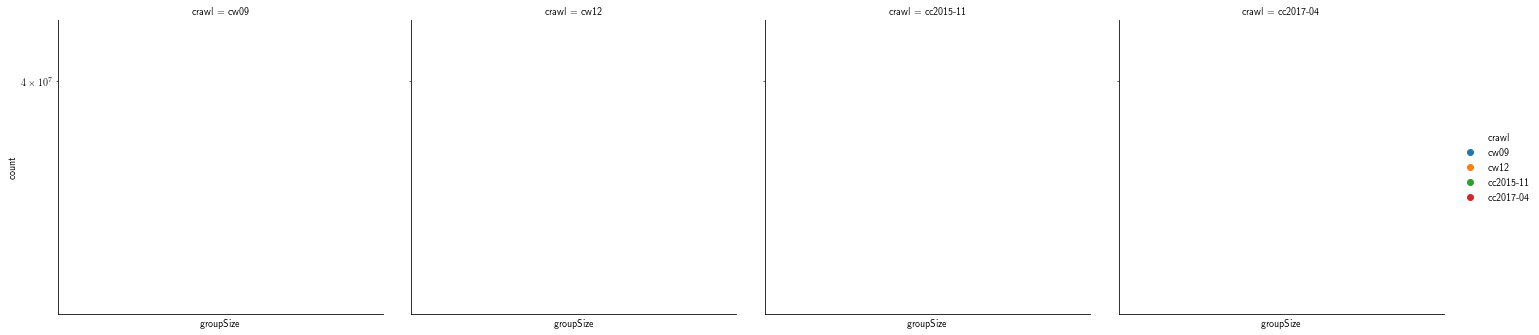

In [47]:
import seaborn as sb
from matplotlib import rc

rc('font',**{'family':'sans-serif'})
rc('text', usetex=True)

df = cw09_df.append(cw12_df)
df = df.append(cc_2015_11_df)
df = df.append(cc_2017_04_df)

my_plot = sb.relplot(data=df, x='groupSize', y='count', col='crawl', hue='crawl')
my_plot.set(xscale="log", yscale="log")

In [24]:
cc_2015_11_df_sample_01 = sqlContext.read.json('cikm2020/canonical-link-graph/cc-2015-11-duplicate-group-counts-sample-0.05/').toPandas()
cc_2015_11_df_sample_02 = sqlContext.read.json('cikm2020/canonical-link-graph/cc-2015-11-duplicate-group-counts-sample-0.1/').toPandas()
cc_2015_11_df_sample_03 = sqlContext.read.json('cikm2020/canonical-link-graph/cc-2015-11-duplicate-group-counts-sample-0.15/').toPandas()

cc_2017_04_df_sample_03 = sqlContext.read.json('cikm2020/canonical-link-graph/cc-2017-04-duplicate-group-counts-sample-0.15/').toPandas()
cc_2017_04_df_sample_02 = sqlContext.read.json('cikm2020/canonical-link-graph/cc-2017-04-duplicate-group-counts-sample-0.1/').toPandas()
cc_2017_04_df_sample_01 = sqlContext.read.json('cikm2020/canonical-link-graph/cc-2017-04-duplicate-group-counts-sample-0.05/').toPandas()


cc_2015_11_df_sample_01['crawl'] = 'cc2015-11 0.05'
cc_2015_11_df_sample_02['crawl'] = 'cc2015-11 0.1'
cc_2015_11_df_sample_03['crawl'] = 'cc2015-11 0.15'

cc_2017_04_df_sample_01['crawl'] = 'cc2017-04 0.05'
cc_2017_04_df_sample_02['crawl'] = 'cc2017-04 0.1'
cc_2017_04_df_sample_03['crawl'] = 'cc2017-04 0.15'


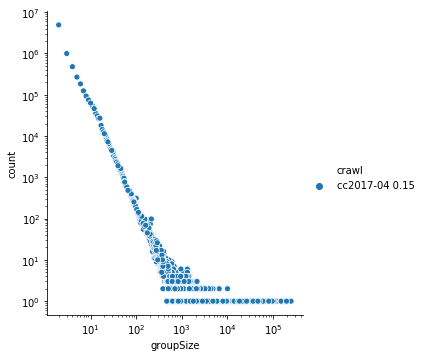

In [27]:
import seaborn as sb

df2 = cc_2015_11_df_sample_01.append(cc_2015_11_df_sample_02)
df2 = df2.append(cc_2015_11_df_sample_03)

my_plot = sb.relplot(data=cc_2017_04_df_sample_03, x='groupSize', y='count', hue='crawl')
my_plot.set(xscale="log", yscale="log")

In [6]:
sc.textFile('-canonical-urls-to-count')


[None, None]

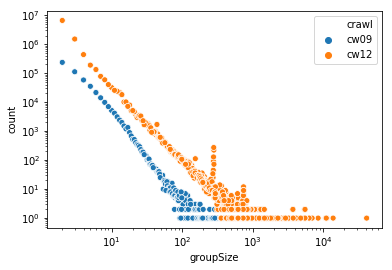

In [36]:
import seaborn as sb

df = cw09_df.append(cw12_df)

my_plot = sb.scatterplot(data=df, x='groupSize', y='count', hue='crawl')
my_plot.set(xscale="log", yscale="log")

In [72]:
cw12_df

NameError: name 'cw12_df' is not defined

In [2]:
cw09_domain_df = sqlContext.read.json('cikm2020/canonical-link-graph/cw09-duplicate-group-counts-per-domain').toPandas()
cw12_domain_df = sqlContext.read.json('cikm2020/canonical-link-graph/cw12-duplicate-group-counts-per-domain').toPandas()
cc15_domain_df = sqlContext.read.json('cikm2020/canonical-link-graph/cc-2015-11-duplicate-group-counts-per-domain').toPandas()
cc17_domain_df = sqlContext.read.json('cikm2020/canonical-link-graph/cc-2017-04-duplicate-group-counts-per-domain').toPandas()


In [4]:
print(cc15_domain_df['documents'].sum())
cc15_domain_df.sort_values('documents', ascending=False).head(10)

412068161


,documents,domain,groups
334304,9210193,www.urbandictionary.com,332111
148265,1890011,m.mlb.com,219022
514690,962841,www.agoda.com,207466
1146607,947230,www.popsugar.com,205024
348031,797899,www.cnet.com,134661
95999,767661,news.iheart.com,27626
630554,752026,www.atgstores.com,135839
648389,661389,www.heraldnet.com,32164
950862,591434,bit.ly,175226
805251,573304,www.shopworldkitchen.com,3146


In [5]:
print(cc17_domain_df['documents'].sum())
cc17_domain_df.sort_values('documents', ascending=False).head(10)

274135961


,documents,domain,groups
852877,2800690,www.urbandictionary.com,243178
352227,1677634,www.merkur.de,230792
1468166,1109398,www.tz.de,157135
382190,1034248,www.iheart.com,19259
709166,631549,www.hna.de,78698
490110,533818,en.wikipedia.org,216960
1106235,529889,dev.twitter.com,39
1497872,519283,www.audible.com,101276
1404401,510224,www.latimes.com,141265
695512,490227,www.shopworldkitchen.com,1044


In [45]:
print(cw09_domain_df['documents'].sum())
cw09_domain_df.sort_values('documents', ascending=False).head(10)

2075480


,documents,domain,groups
563,2046566,en.wikipedia.org,514911
63,2503,www.automobilsport.com,1
326,1890,www.campingcompass.com,1
48,1582,www.phpclasses.org,550
572,1126,www.relacionarse.com,514
687,1001,bitacoras.com,1
191,777,www.poolplaza.com,1
235,774,www.icemiller.com,167
207,654,yugioh.wikia.com,159
626,652,muppet.wikia.com,301


In [21]:
print(cw12_domain_df['documents'].sum())
cw12_domain_df.sort_values('documents', ascending=False).head(10).values[0][1]

29967412


'www.beyond.com'

In [55]:
def url(str_val):
    return ' {\\footnotesize ' + str_val.replace('www.', '') + '}'

def numb(val):
    return ' {\\footnotesize ' + ('{:.1E}'.format(val)).replace('E+0', 'e') + ' } '

def bla():
    cw09_arr = cw09_domain_df.sort_values('documents', ascending=False).head(10).values
    cw12_arr = cw12_domain_df.sort_values('documents', ascending=False).head(10).values
    cc15_arr = cc15_domain_df.sort_values('documents', ascending=False).head(10).values
    cc17_arr = cc17_domain_df.sort_values('documents', ascending=False).head(10).values
    lines = ''
    
    for i in range(0,10):
        lines += '\n ' + url(cw09_arr[i][1]) + '$_{\\text{ tag}}$ & ' + numb(cw09_arr[i][0]) + ' & ' + numb(cw09_arr[i][2]) + ' & ' + \
        url(cw12_arr[i][1]) + '$_{\\text{ tag}}$ & ' + numb(cw12_arr[i][0]) + ' & ' + numb(cw12_arr[i][2]) + ' & ' +\
        url(cc15_arr[i][1]) + '$_{\\text{ tag}}$ & ' + numb(cc15_arr[i][0]) + ' & ' + numb(cc15_arr[i][2]) + ' & ' +\
        url(cc17_arr[i][1]) + '$_{\\text{ tag}}$ & ' + numb(cc17_arr[i][0]) + ' & ' + numb(cc17_arr[i][2]) + ' \\\\ \n'
    
    return """\\begin{table*}
\\centering
\\small
\\setlength{\\tabcolsep}{3pt}%
\\caption{TBD}
\\label{table-domains-in-canonical-link-graph}
\\begin{tabular}{@{}ccc@{\\hspace{1\\tabcolsep}}ccc@{\\hspace{1\\tabcolsep}}ccc@{\\hspace{1\\tabcolsep}}ccc@{}}

\\toprule
\\multicolumn{3}{c@{}}{\\bfseries ClueWeb09} & \\multicolumn{3}{c@{}}{\\bfseries ClueWeb12} & \\multicolumn{3}{c@{}}{\\bfseries CC 2015} & \\multicolumn{3}{c@{}}{\\bfseries CC 2017}\\\\

\\cmidrule(r){1-3}
\\cmidrule(r){4-6}
\\cmidrule(r){7-9}
\\cmidrule(r){10-12}

Domain & Docs & Groups & Domain & Docs & Groups & Domain & Docs & Groups & Domain & Docs & Groups\\\\
\\midrule

""" + lines +\
"""

\\bottomrule

\\end{tabular}
\\end{table*}
"""

print(bla())

\begin{table*}
\centering
\small
\setlength{\tabcolsep}{3pt}%
\caption{TBD}
\label{table-domains-in-canonical-link-graph}
\begin{tabular}{@{}ccc@{\hspace{1\tabcolsep}}ccc@{\hspace{1\tabcolsep}}ccc@{\hspace{1\tabcolsep}}ccc@{}}

\toprule
\multicolumn{3}{c@{}}{\bfseries ClueWeb09} & \multicolumn{3}{c@{}}{\bfseries ClueWeb12} & \multicolumn{3}{c@{}}{\bfseries CC 2015} & \multicolumn{3}{c@{}}{\bfseries CC 2017}\\

\cmidrule(r){1-3}
\cmidrule(r){4-6}
\cmidrule(r){7-9}
\cmidrule(r){10-12}

Domain & Docs & Groups & Domain & Docs & Groups & Domain & Docs & Groups & Domain & Docs & Groups\\
\midrule


  {\footnotesize en.wikipedia.org}$_{\text{ tag}}$ &  {\footnotesize 2.0e6 }  &  {\footnotesize 5.1e5 }  &  {\footnotesize beyond.com}$_{\text{ tag}}$ &  {\footnotesize 3.7e5 }  &  {\footnotesize 3.5e3 }  &  {\footnotesize urbandictionary.com}$_{\text{ tag}}$ &  {\footnotesize 9.2e6 }  &  {\footnotesize 3.3e5 }  &  {\footnotesize urbandictionary.com}$_{\text{ tag}}$ &  {\footnotesize 2.8e6 }  &  {

# Plot S3-Similarities


In [34]:
def s3_score_to_absolute_count(sc, collection):
    import json
    file_name = 'cikm2020/canonical-link-graph/' + collection + '-s3-edge-aggregations'
    all = sc.textFile(file_name).map(lambda i: json.loads(i)).collect()
    if(len(all) != 1):
        raise ValueError('Fix this')
    return all[0]

canonical_edges_cw09 = s3_score_to_absolute_count(sc, 'cw09')
canonical_edges_cw12 = s3_score_to_absolute_count(sc, 'cw12')

In [66]:
def aggregate(edges):
    edge_count = sum(edges.values())
    keys = sorted([i for i in canonical_edges_cw12.keys()], key=lambda i: float(i))
    ret = {};
    current = 0
    
    for k in keys:
        current += edges[k]
        
        ret[k] = current/edge_count
    
    return ret
    
def plot_cumulative_amount_of_edges_with_s3_score(data):
    import seaborn as sb
    import pandas as pd
    tmp = aggregate(data)
    df = pd.DataFrame({'s3Score': [float(i) for i in tmp.keys()], 'percentage': [i for i in tmp.values()]})

    sb.lineplot(data=df, x='s3Score', y='percentage')


In [71]:
sum(canonical_edges_cw12.values())

85283340

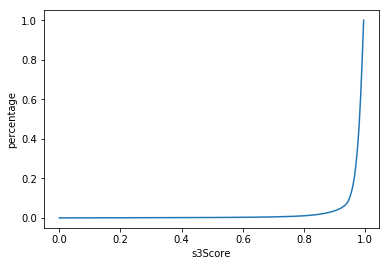

In [67]:
plot_cumulative_amount_of_edges_with_s3_score(canonical_edges_cw12)

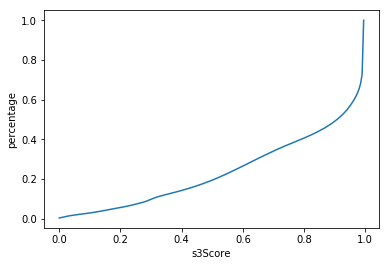

In [41]:
plot_amount_of_edges_with_s3_score(canonical_edges_cw12)

In [57]:
def plot_histogram_amount_of_edges_with_s3_score(data):
    import seaborn as sb
    import pandas as pd
    df = pd.DataFrame({'s3Score': [float(i) for i in data.keys()], 'percentage': [i for i in data.values()]})

    ret = sb.barplot(data=df, x='s3Score', y='percentage')
    return ret

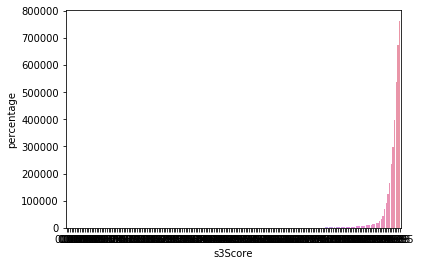

In [58]:
plot_histogram_amount_of_edges_with_s3_score(canonical_edges_cw09)

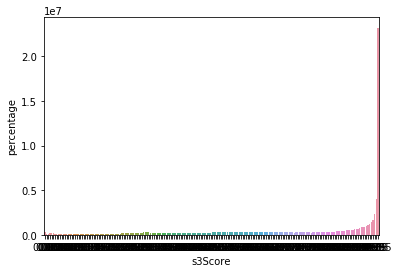

In [52]:
plot_histogram_amount_of_edges_with_s3_score(canonical_edges_cw12)

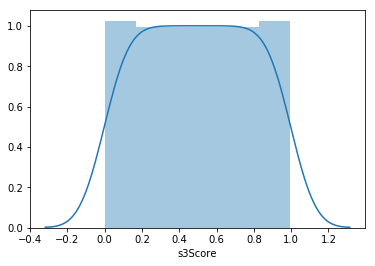

In [56]:
data = canonical_edges_cw12
df = pd.DataFrame({'s3Score': [float(i) for i in data.keys()], 'percentage': [i for i in data.values()]})

sb.distplot(df['s3Score'])

In [56]:
canonical_edges_cw09

NameError: name 'canonical_edges_cw09' is not defined